In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as pl
import seaborn as sns
pl.rcParams['figure.figsize']=10,8
sns.set_style('whitegrid')

In [2]:
train=pd.read_csv('titanic_train.csv')
test=pd.read_csv('titanic_test.csv')

In [3]:
train.head()

,passenger_id,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,survived
0,1216,3,"Smyth, Miss. Julia",female,NaN,0,0,335432,7.7333,NaN,Q,13,NaN,NaN,1
1,699,3,"Cacic, Mr. Luka",male,38.0,0,0,315089,8.6625,NaN,S,NaN,NaN,Croatia,0
2,1267,3,"Van Impe, Mrs. Jean Baptiste (Rosalie Paula Go...",female,30.0,1,1,345773,24.1500,NaN,S,NaN,NaN,NaN,0
3,449,2,"Hocking, Mrs. Elizabeth (Eliza Needs)",female,54.0,1,3,29105,23.0000,NaN,S,4,NaN,"Cornwall / Akron, OH",1
4,576,2,"Veal, Mr. James",male,40.0,0,0,28221,13.0000,NaN,S,NaN,NaN,"Barre, Co Washington, VT",0


In [4]:
train.shape

(850, 15)

In [5]:
gender_baseline=pd.read_csv('gender_baseline.csv')

In [7]:
train.isnull().sum()

passenger_id      0
pclass            0
name              0
sex               0
age             174
sibsp             0
parch             0
ticket            0
fare              1
cabin           659
embarked          1
boat            542
body            777
home.dest       386
survived          0
dtype: int64

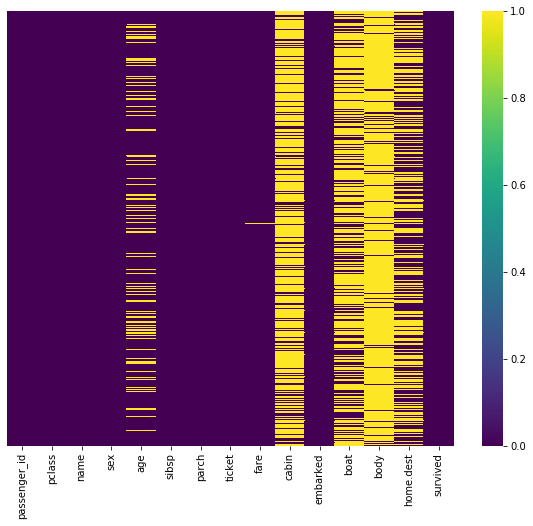

In [10]:
sns.heatmap(train.isnull(),yticklabels=False,cmap='viridis')

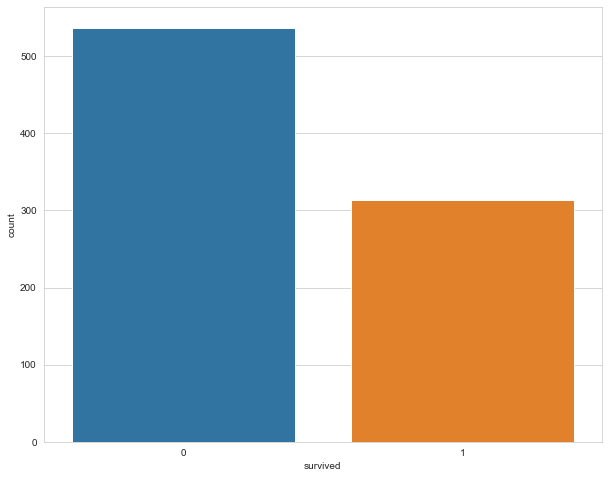

In [14]:
sns.countplot(train['survived'])

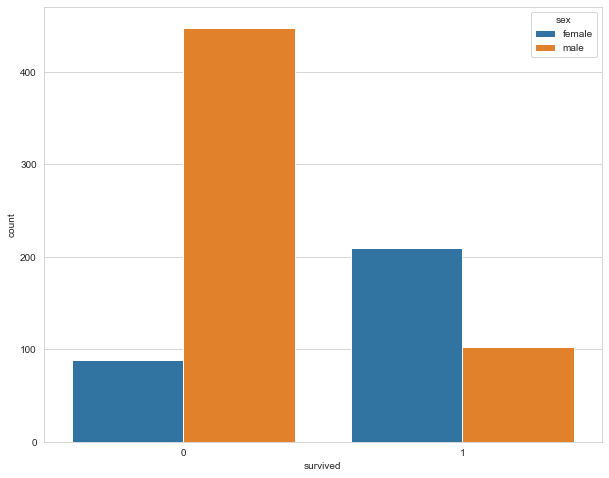

In [16]:
sns.countplot(x='survived',hue='sex',data=train)

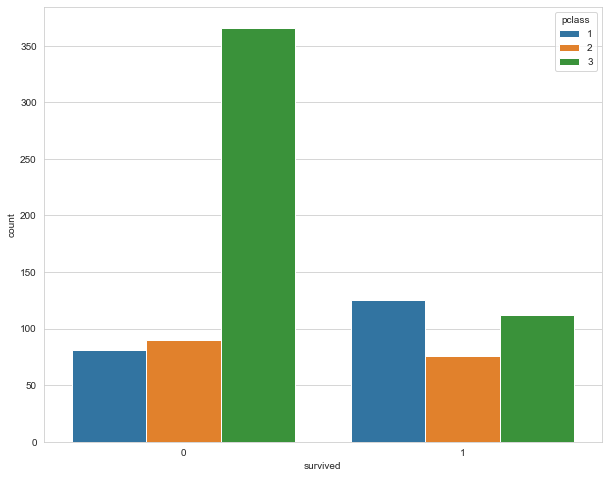

In [17]:
sns.countplot(x='survived',hue='pclass',data=train)

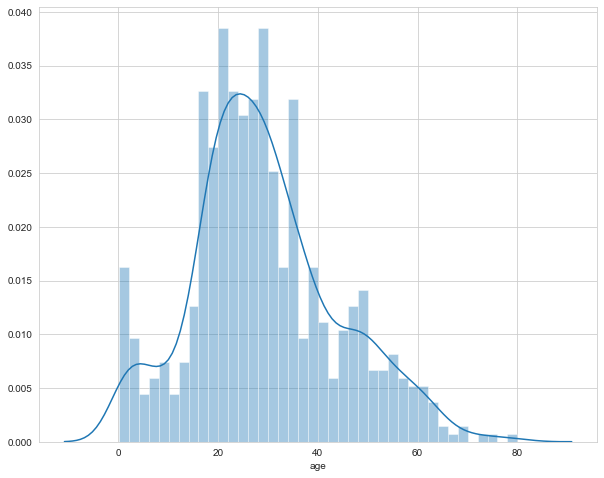

In [21]:
sns.distplot(train['age'].dropna(),bins=40)

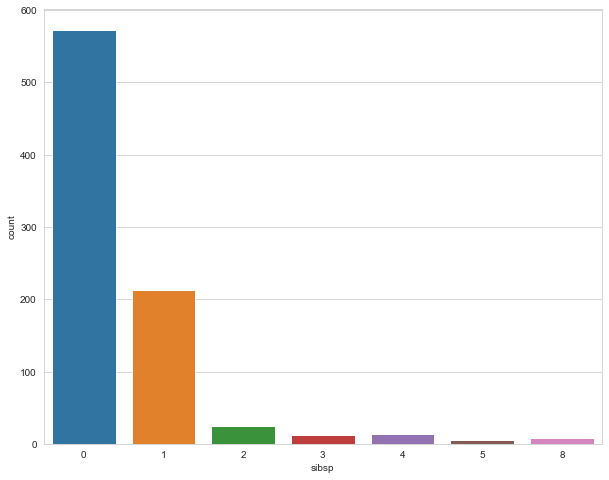

In [28]:
# This shows who have sibling and spouces
sns.countplot(train['sibsp'])

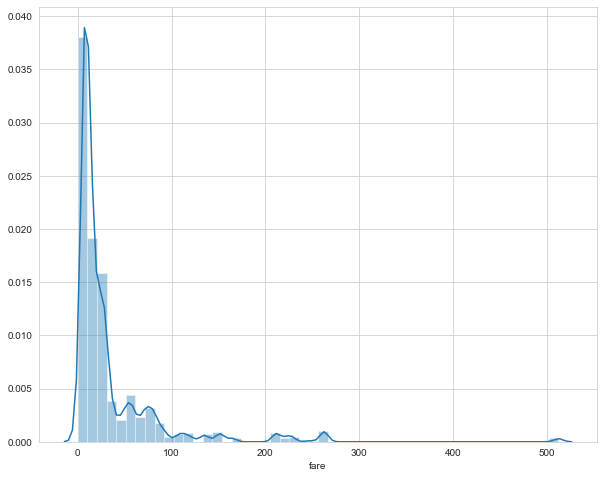

In [29]:
sns.distplot(train['fare'])

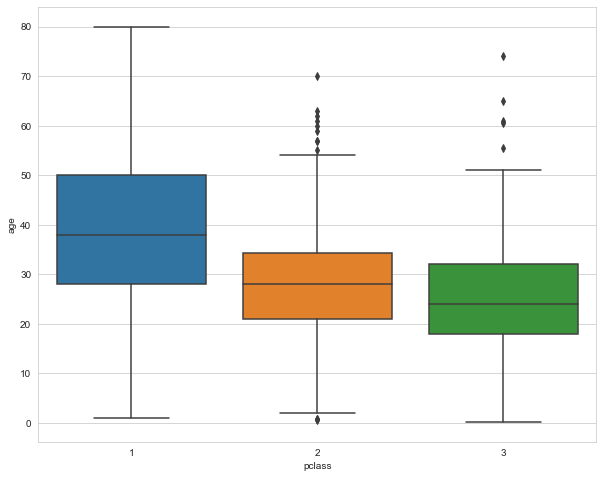

In [33]:
sns.boxplot(data=train,x='pclass',y='age')

In [60]:
def input_age(cols):
    age=cols[0]
    pclass=cols[1]
    if pd.isnull(age):
        if pclass==1:
            return 37
        elif pclass==2:
            return 28
        else:
            return 24
    else:
        return age

In [63]:
train['age']=train[['age','pclass']].apply(input_age,axis=1)

In [50]:
train.drop(['boat','body','home.dest'],axis=1,inplace=True)

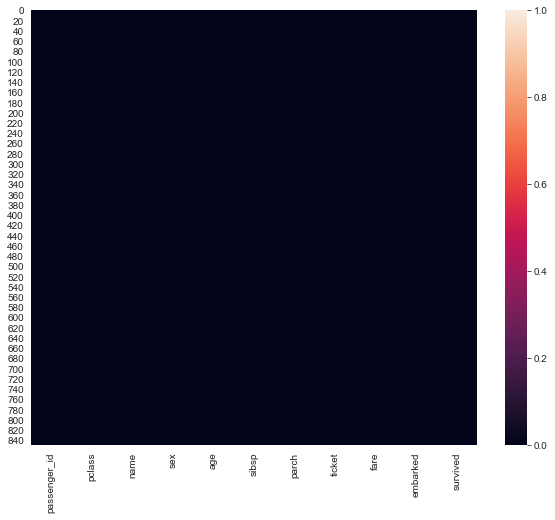

In [72]:
sns.heatmap(train.isnull())

In [68]:
train.drop('cabin',axis=1,inplace=True)

In [71]:
train.head()

,passenger_id,pclass,name,sex,age,sibsp,parch,ticket,fare,embarked,survived
0,1216,3,"Smyth, Miss. Julia",female,24,0,0,335432,7.7333,Q,1
1,699,3,"Cacic, Mr. Luka",male,24,0,0,315089,8.6625,S,0
2,1267,3,"Van Impe, Mrs. Jean Baptiste (Rosalie Paula Go...",female,24,1,1,345773,24.1500,S,0
3,449,2,"Hocking, Mrs. Elizabeth (Eliza Needs)",female,28,1,3,29105,23.0000,S,1
4,576,2,"Veal, Mr. James",male,28,0,0,28221,13.0000,S,0


In [73]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 850 entries, 0 to 849
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   passenger_id  850 non-null    int64  
 1   pclass        850 non-null    int64  
 2   name          850 non-null    object 
 3   sex           850 non-null    object 
 4   age           850 non-null    int64  
 5   sibsp         850 non-null    int64  
 6   parch         850 non-null    int64  
 7   ticket        850 non-null    object 
 8   fare          849 non-null    float64
 9   embarked      849 non-null    object 
 10  survived      850 non-null    int64  
dtypes: float64(1), int64(6), object(4)
memory usage: 73.2+ KB


In [74]:
sex=pd.get_dummies(train['sex'],drop_first=True)
embark=pd.get_dummies(train['embarked'],drop_first=True)

In [75]:
train.drop(['sex','embarked','name','ticket'],axis=1,inplace=True)

In [76]:
train

,passenger_id,pclass,age,sibsp,parch,fare,survived
0,1216,3,24,0,0,7.7333,1
1,699,3,24,0,0,8.6625,0
2,1267,3,24,1,1,24.1500,0
3,449,2,28,1,3,23.0000,1
4,576,2,28,0,0,13.0000,0
...,...,...,...,...,...,...,...
845,158,1,37,0,0,50.0000,0
846,174,1,37,0,0,29.7000,0
847,467,2,28,1,0,26.0000,1
848,1112,3,24,1,1,13.7750,0


In [78]:
train=pd.concat([train,sex,embark],axis=1)
train.head()

,passenger_id,pclass,age,sibsp,parch,fare,survived,male,Q,S
0,1216,3,24,0,0,7.7333,1,0,1,0
1,699,3,24,0,0,8.6625,0,1,0,1
2,1267,3,24,1,1,24.1500,0,0,0,1
3,449,2,28,1,3,23.0000,1,0,0,1
4,576,2,28,0,0,13.0000,0,1,0,1


In [88]:
train.drop('passenger_id',axis=1,inplace=True)

In [91]:
train.dropna(inplace=True)

In [92]:
X_train=train.drop('survived',axis=1)
y_train=train['survived']

In [93]:
X_train.head()

,pclass,age,sibsp,parch,fare,male,Q,S
0,3,24,0,0,7.7333,0,1,0
1,3,24,0,0,8.6625,1,0,1
2,3,24,1,1,24.1500,0,0,1
3,2,28,1,3,23.0000,0,0,1
4,2,28,0,0,13.0000,1,0,1


In [94]:
y_train.head()

0    1
1    0
2    0
3    1
4    0
Name: survived, dtype: int64

In [95]:
from sklearn.linear_model import LogisticRegression

In [96]:
X_train.isnull().sum()

pclass    0
age       0
sibsp     0
parch     0
fare      0
male      0
Q         0
S         0
dtype: int64

In [97]:
logreg=LogisticRegression()
logreg.fit(X_train,y_train)

C:\Users\rissu\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [98]:
logreg.score(X_train,y_train)

0.7879858657243817

In [99]:
from sklearn.ensemble import RandomForestClassifier

In [100]:
classifier=RandomForestClassifier()

In [101]:
classifier.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [102]:
classifier.score(X_train,y_train)

0.9234393404004712